In [6]:
from PyQubo_formulation import *

import matplotlib.pyplot as plt

In [33]:
x, xvars = Create_Float_Vec(4, 4, [0,1], 'x')
x


array([(0.500000 * (((Binary('x[0]') + (0.500000 * Binary('x[1]'))) + (0.250000 * Binary('x[2]'))) + (0.125000 * Binary('x[3]')))),
       (0.500000 * (((Binary('x[4]') + (0.500000 * Binary('x[5]'))) + (0.250000 * Binary('x[6]'))) + (0.125000 * Binary('x[7]')))),
       (0.500000 * (((Binary('x[8]') + (0.500000 * Binary('x[9]'))) + (0.250000 * Binary('x[10]'))) + (0.125000 * Binary('x[11]')))),
       (0.500000 * (((Binary('x[12]') + (0.500000 * Binary('x[13]'))) + (0.250000 * Binary('x[14]'))) + (0.125000 * Binary('x[15]'))))],
      dtype=object)

In [34]:
k, kvars = Create_Float_Vec(4, 4, [0,1], 'k')
k

array([(0.500000 * (((Binary('k[0]') + (0.500000 * Binary('k[1]'))) + (0.250000 * Binary('k[2]'))) + (0.125000 * Binary('k[3]')))),
       (0.500000 * (((Binary('k[4]') + (0.500000 * Binary('k[5]'))) + (0.250000 * Binary('k[6]'))) + (0.125000 * Binary('k[7]')))),
       (0.500000 * (((Binary('k[8]') + (0.500000 * Binary('k[9]'))) + (0.250000 * Binary('k[10]'))) + (0.125000 * Binary('k[11]')))),
       (0.500000 * (((Binary('k[12]') + (0.500000 * Binary('k[13]'))) + (0.250000 * Binary('k[14]'))) + (0.125000 * Binary('k[15]'))))],
      dtype=object)

In [37]:
mu, muvars = Create_Float_Vec(1, 4, [0,2], 'mu')
mu=mu[0]

In [38]:
from Radio import *


In [41]:
H = np.around(Channel_Rayleigh(2,2), decimals=0)
H

array([[1.+2.j, 1.+0.j],
       [0.+1.j, 1.+1.j]])

In [43]:
s = Create_S(2, 16)
s

array([-3.+3.j,  1.+1.j])

In [5]:
Num_Bin_For_Accuracy(0.01, 1)


(6.0, 0.005625)

/Users/davidbern/Desktop/Desktop/Master/Master Thesis/programming/PyQubo_formulation.py:24: RuntimeWarning: divide by zero encountered in log2
  num_bin = -np.ceil(np.log2(decimal_accuracy / interval_size))


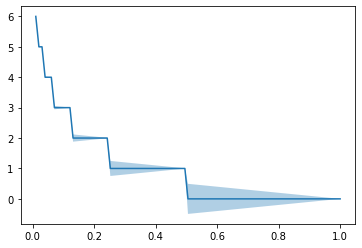

In [27]:
acc = np.linspace(0., 1, 100)

fig, ax = plt.subplots(1)
ax.plot(acc,Num_Bin_For_Accuracy(acc, 1)[0])
ax.fill_between(acc, Num_Bin_For_Accuracy(acc,1)[0] - Num_Bin_For_Accuracy(acc,1)[1], Num_Bin_For_Accuracy(acc,1)[0] + Num_Bin_For_Accuracy(acc,1)[1], alpha=0.35)
# ax.set_yscale('log')
# ax.set_xscale('log')